In [1]:
# download the osm data
import osmnx as ox

# for network analysis
import networkx as nx

# to be able to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

#for plotting
import matplotlib.pyplot as plt



In [2]:
dfbuildings = pd.read_csv('data/locations.csv')

In [3]:
dfbuildings

point_x    point_y                                    match_addr
0  -118.270324  34.066662   ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA
1  -118.265210  33.925480       AVALON BLVD & 118TH PL, LOS ANGELES, CA
2  -118.333482  34.076157    BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA
3  -118.256083  34.016045        CENTRAL AVE & 29TH ST, LOS ANGELES, CA
4  -118.256519  33.953896        CENTRAL AVE & 91ST ST, LOS ANGELES, CA
..         ...        ...                                           ...
77 -118.309022  33.967258        WESTERN AVE & 79TH ST, LOS ANGELES, CA
78 -118.309024  33.966213        WESTERN AVE & 80TH ST, LOS ANGELES, CA
79 -118.362514  34.063030  WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA
80 -118.571422  34.176991   WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA
81 -118.485111  34.230339       WOODLEY AVE & RAYEN ST, LOS ANGELES, CA

[82 rows x 3 columns]

In [4]:
#rename the columns
dfbuildings.columns = ['lon','lat','address']
dfbuildings

lon        lat                                       address
0  -118.270324  34.066662   ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA
1  -118.265210  33.925480       AVALON BLVD & 118TH PL, LOS ANGELES, CA
2  -118.333482  34.076157    BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA
3  -118.256083  34.016045        CENTRAL AVE & 29TH ST, LOS ANGELES, CA
4  -118.256519  33.953896        CENTRAL AVE & 91ST ST, LOS ANGELES, CA
..         ...        ...                                           ...
77 -118.309022  33.967258        WESTERN AVE & 79TH ST, LOS ANGELES, CA
78 -118.309024  33.966213        WESTERN AVE & 80TH ST, LOS ANGELES, CA
79 -118.362514  34.063030  WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA
80 -118.571422  34.176991   WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA
81 -118.485111  34.230339       WOODLEY AVE & RAYEN ST, LOS ANGELES, CA

[82 rows x 3 columns]

In [5]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdfbuildings = gpd.GeoDataFrame(dfbuildings, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfbuildings.lon, dfbuildings.lat)) 



In [6]:
gdfbuildings

lon        lat                                       address  \
0  -118.270324  34.066662   ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA   
1  -118.265210  33.925480       AVALON BLVD & 118TH PL, LOS ANGELES, CA   
2  -118.333482  34.076157    BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA   
3  -118.256083  34.016045        CENTRAL AVE & 29TH ST, LOS ANGELES, CA   
4  -118.256519  33.953896        CENTRAL AVE & 91ST ST, LOS ANGELES, CA   
..         ...        ...                                           ...   
77 -118.309022  33.967258        WESTERN AVE & 79TH ST, LOS ANGELES, CA   
78 -118.309024  33.966213        WESTERN AVE & 80TH ST, LOS ANGELES, CA   
79 -118.362514  34.063030  WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA   
80 -118.571422  34.176991   WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA   
81 -118.485111  34.230339       WOODLEY AVE & RAYEN ST, LOS ANGELES, CA   

                       geometry  
0   POINT (-118.27032 34.06666)  
1   POINT (-118.26521 33.92548)  
2   POINT (-118.33348 34.07616)  
3   POINT (-118.25608 34.01604)  
4   POINT (-118.25652 33.95390)  
..                          ...  
77  POINT (-118.30902 33.96726)  
78  POINT (-118.30902 33.96621)  
79  POINT (-118.36251 34.06303)  
80  POINT (-118.57142 34.17699)  
81  POINT (-118.48511 34.23034)  

[82 rows x 4 columns]

## Find all building categories in these points

Since I need to add a column with each of the building types, I'm trying to find out what all of the buildings types within my data is. I can find a list of building types in the OSMNX documentation, but there are a ton and I suspect not all of them are present in LA. 

**First let me try to find out what all the categories of buildings are using just one point**

In [8]:
##pull the building data
G = ox.geometries_from_point((34.18670122912705, -118.44872393539862),tags={'building':True},dist=200)

#call the function that finds the unique values
G_buildingcategories = G.building.unique()

print 
G_buildingcategories

array(['yes', 'retail', 'commercial', 'school', 'industrial'],
      dtype=object)

That works! Now let's see if I can do something similar but for all the points, so using functions and loops

In [9]:
#creat the function
def findbuildingcategories(lat,lon):

    #call osmnx with a lat/long pair
    G = ox.geometries_from_point((lat,lon),tags={'building':True},dist=200)
    
    #find the unique values
    G = G.building.unique()
    
    #display the results
    print(G)

In [10]:
# test the function
findbuildingcategories(34.18670122912705, -118.44872393539862)

['yes' 'retail' 'commercial' 'school' 'industrial']


In [11]:
#create loop
for index, row in gdfbuildings.iterrows():
    print(str(index)+'...')
   
    #call the function    
    try:
        findbuildingcategories(row.lat,row.lon)
        
    except:
        findbuildingcategories[building!=0] 

0...
['school' 'yes' 'industrial' 'residential' 'apartments' 'house' 'hotel'
 'commercial' 'retail']
1...
['house' 'residential' 'yes' 'retail' 'apartments' 'hotel' 'commercial']
2...
['yes' 'house' 'industrial']
3...
['residential' 'commercial' 'house' 'apartments' 'retail' 'industrial'
 'yes' 'warehouse']
4...
['house' 'residential' 'retail' 'industrial' 'commercial' 'apartments'
 'yes']
5...
['house' 'residential' 'industrial' 'retail' 'commercial' 'apartments'
 'yes']
6...
['apartments' 'house' 'residential' 'commercial' 'yes' 'industrial'
 'retail']
7...
['industrial' 'residential' 'house' 'retail' 'apartments' 'yes' 'school'
 'commercial']
8...
['yes' 'house' 'commercial' 'residential' 'apartments' 'retail']
9...
['office' 'yes' 'industrial' 'commercial' 'warehouse' 'factory' 'retail'
 'roof' 'parking']
10...
['house' 'yes']
11...
['apartments' 'retail' 'hotel' 'house' 'residential' 'yes' 'school'
 'commercial']
12...
['house' 'apartments' 'residential' 'retail' 'yes' 'commercial

NameError: name 'building' is not defined

This is maybe not the cleanest way to do this, maybe I'd next put all these into a df so I could sort them and just get it to print each varaible once? I also cannot figure out how to write the excpetion so that it runs even if a row does not have the buildings variable! But I want to move on to start being able to set up the code to analyze the building types, so I'll use the cateogire back to this later! 

## Add data to gdf

In [12]:
# add new columns to geodataframe
gdfbuildings['retail']=0
gdfbuildings['residential']=0
gdfbuildings['apartments']=0
gdfbuildings['house']=0
gdfbuildings['hospital']=0
gdfbuildings['school']=0
gdfbuildings['hotel']=0
gdfbuildings['commercial']=0
gdfbuildings['officec']=0
gdfbuildings['retail']=0
gdfbuildings['factory']=0
gdfbuildings['industrial']=0
gdfbuildings['warehouse']=0
gdfbuildings['parking']=0
gdfbuildings['garage']=0
gdfbuildings['roof']=0
gdfbuildings['yes']=0

In [13]:
gdfbuildings

lon        lat                                       address  \
0  -118.270324  34.066662   ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA   
1  -118.265210  33.925480       AVALON BLVD & 118TH PL, LOS ANGELES, CA   
2  -118.333482  34.076157    BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA   
3  -118.256083  34.016045        CENTRAL AVE & 29TH ST, LOS ANGELES, CA   
4  -118.256519  33.953896        CENTRAL AVE & 91ST ST, LOS ANGELES, CA   
..         ...        ...                                           ...   
77 -118.309022  33.967258        WESTERN AVE & 79TH ST, LOS ANGELES, CA   
78 -118.309024  33.966213        WESTERN AVE & 80TH ST, LOS ANGELES, CA   
79 -118.362514  34.063030  WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA   
80 -118.571422  34.176991   WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA   
81 -118.485111  34.230339       WOODLEY AVE & RAYEN ST, LOS ANGELES, CA   

                       geometry  retail  residential  apartments  house  \
0   POINT (-118.27032 34.06666)       0            0           0      0   
1   POINT (-118.26521 33.92548)       0            0           0      0   
2   POINT (-118.33348 34.07616)       0            0           0      0   
3   POINT (-118.25608 34.01604)       0            0           0      0   
4   POINT (-118.25652 33.95390)       0            0           0      0   
..                          ...     ...          ...         ...    ...   
77  POINT (-118.30902 33.96726)       0            0           0      0   
78  POINT (-118.30902 33.96621)       0            0           0      0   
79  POINT (-118.36251 34.06303)       0            0           0      0   
80  POINT (-118.57142 34.17699)       0            0           0      0   
81  POINT (-118.48511 34.23034)       0            0           0      0   

    hospital  school  hotel  commercial  officec  factory  industrial  \
0          0       0      0           0        0        0           0   
1          0       0      0           0        0        0           0   
2          0       0      0           0        0        0           0   
3          0       0      0           0        0        0           0   
4          0       0      0           0        0        0           0   
..       ...     ...    ...         ...      ...      ...         ...   
77         0       0      0           0        0        0           0   
78         0       0      0           0        0        0           0   
79         0       0      0           0        0        0           0   
80         0       0      0           0        0        0           0   
81         0       0      0           0        0        0           0   

    warehouse  parking  garage  roof  yes  
0           0        0       0     0    0  
1           0        0       0     0    0  
2           0        0       0     0    0  
3           0        0       0     0    0  
4           0        0       0     0    0  
..        ...      ...     ...   ...  ...  
77          0        0       0     0    0  
78          0        0       0     0    0  
79          0        0       0     0    0  
80          0        0       0     0    0  
81          0        0       0     0    0  

[82 rows x 20 columns]

In [14]:
def analyze_buildinguse(lat,lon):

    #call osmnx with a lat/long pair
    G = ox.geometries_from_point((lat,lon),tags={'building':True},dist=200)
    
    #return observations as a dictionary
    
    d = dict()
    
    try:
        d['retail']=len(G[G['building'] == 'retail'])
        
    except:
        d['retail']=0
    return d
    

In [15]:
#create loop
for index, row in gdfbuildings.iterrows():
    print(str(index)+'...')
    #call the function
    newdata = analyze_buildinguse(row.lat,row.lon)
    
    
    #add data to existing gdf column
    gdfbuildings.loc[index, 'retail'] = newdata['retail']


0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
10...
11...
12...
13...
14...
15...
16...
17...
18...
19...
20...
21...
22...
23...
24...
25...
26...
27...
28...
29...
30...
31...
32...
33...
34...
35...
36...
37...
38...
39...
40...
41...
42...
43...
44...
45...
46...
47...
48...
49...
50...
51...
52...
53...
54...
55...
56...
57...
58...
59...
60...
61...
62...
63...
64...
65...
66...
67...
68...
69...
70...
71...
72...
73...
74...
75...
76...
77...
78...
79...
80...
81...


In [16]:
gdfbuildings

lon        lat                                       address  \
0  -118.270324  34.066662   ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA   
1  -118.265210  33.925480       AVALON BLVD & 118TH PL, LOS ANGELES, CA   
2  -118.333482  34.076157    BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA   
3  -118.256083  34.016045        CENTRAL AVE & 29TH ST, LOS ANGELES, CA   
4  -118.256519  33.953896        CENTRAL AVE & 91ST ST, LOS ANGELES, CA   
..         ...        ...                                           ...   
77 -118.309022  33.967258        WESTERN AVE & 79TH ST, LOS ANGELES, CA   
78 -118.309024  33.966213        WESTERN AVE & 80TH ST, LOS ANGELES, CA   
79 -118.362514  34.063030  WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA   
80 -118.571422  34.176991   WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA   
81 -118.485111  34.230339       WOODLEY AVE & RAYEN ST, LOS ANGELES, CA   

                       geometry  retail  residential  apartments  house  \
0   POINT (-118.27032 34.06666)       3            0           0      0   
1   POINT (-118.26521 33.92548)       4            0           0      0   
2   POINT (-118.33348 34.07616)       0            0           0      0   
3   POINT (-118.25608 34.01604)      14            0           0      0   
4   POINT (-118.25652 33.95390)      18            0           0      0   
..                          ...     ...          ...         ...    ...   
77  POINT (-118.30902 33.96726)      14            0           0      0   
78  POINT (-118.30902 33.96621)      13            0           0      0   
79  POINT (-118.36251 34.06303)       9            0           0      0   
80  POINT (-118.57142 34.17699)       0            0           0      0   
81  POINT (-118.48511 34.23034)       3            0           0      0   

    hospital  school  hotel  commercial  officec  factory  industrial  \
0          0       0      0           0        0        0           0   
1          0       0      0           0        0        0           0   
2          0       0      0           0        0        0           0   
3          0       0      0           0        0        0           0   
4          0       0      0           0        0        0           0   
..       ...     ...    ...         ...      ...      ...         ...   
77         0       0      0           0        0        0           0   
78         0       0      0           0        0        0           0   
79         0       0      0           0        0        0           0   
80         0       0      0           0        0        0           0   
81         0       0      0           0        0        0           0   

    warehouse  parking  garage  roof  yes  
0           0        0       0     0    0  
1           0        0       0     0    0  
2           0        0       0     0    0  
3           0        0       0     0    0  
4           0        0       0     0    0  
..        ...      ...     ...   ...  ...  
77          0        0       0     0    0  
78          0        0       0     0    0  
79          0        0       0     0    0  
80          0        0       0     0    0  
81          0        0       0     0    0  

[82 rows x 20 columns]

## Visualization

In [21]:
#let's try making a function to visualize the building uses

#define the function
def map_buildinguse(lat,lon):
    
     #call osmnx with a lat/long pair
    G = ox.geometries_from_point((lat,lon),tags={'building':True},dist=200)
   
    #create plot
    ax = G.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)


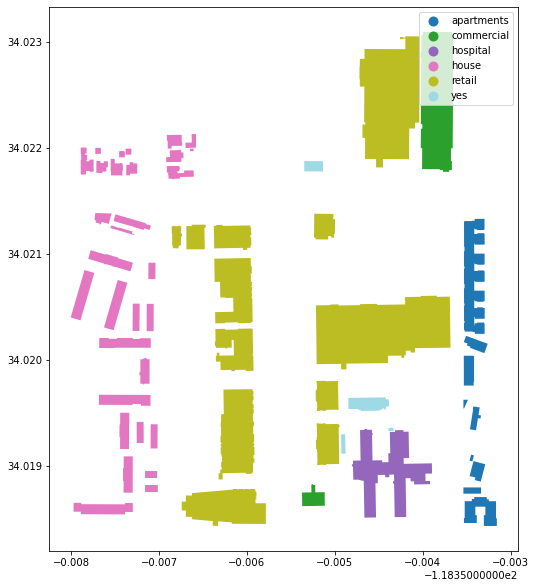

In [22]:
#test the function
map_buildinguse(34.02020645,-118.3556258)

0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
10...
11...
12...
13...
14...
15...
16...
17...
18...
19...
20...


/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


21...
22...
23...
24...
25...
26...
27...
28...
29...
30...
31...


/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


32...
33...
34...
35...
36...
37...
38...
39...
40...
41...
42...
43...
44...
45...
46...
47...
48...
49...
50...
51...
52...
53...
54...
55...
56...
57...
58...
59...
60...
61...
62...
63...
64...
65...
66...
67...
68...
69...
70...
71...
72...
73...
74...
75...
76...
77...
78...
79...
80...
81...


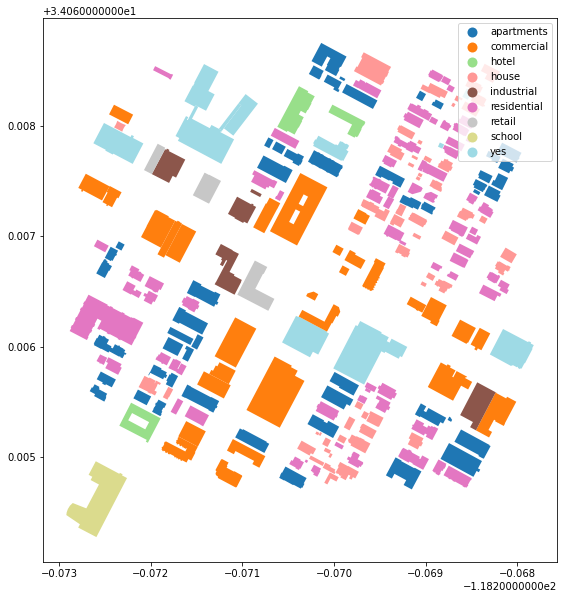

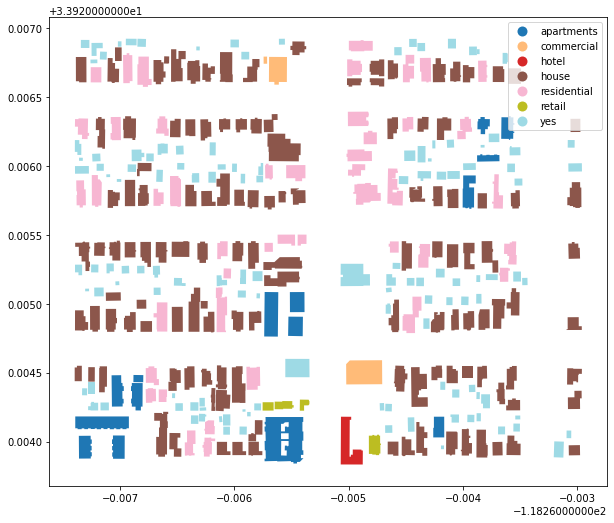

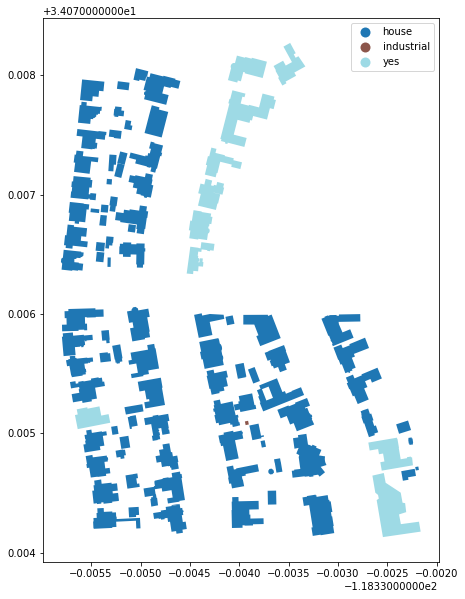

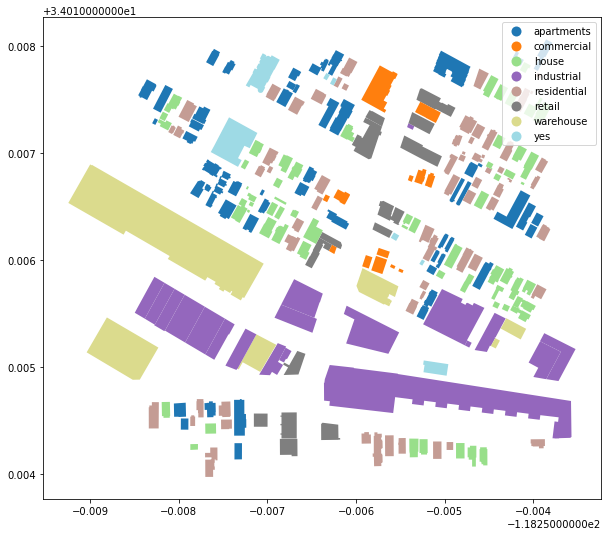

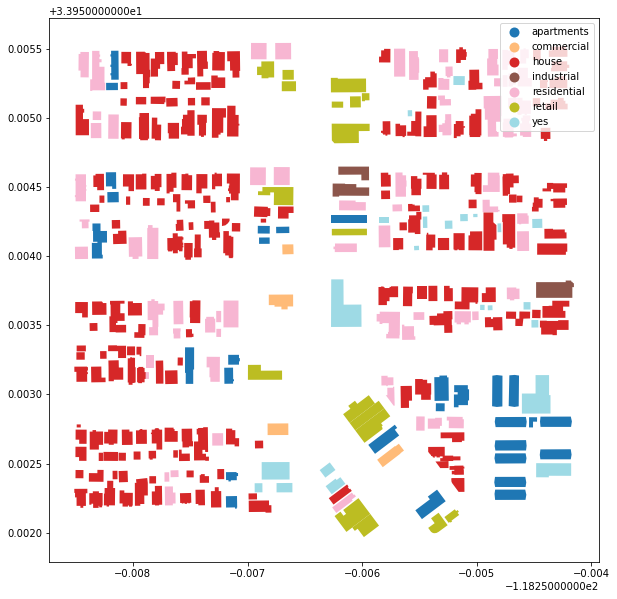

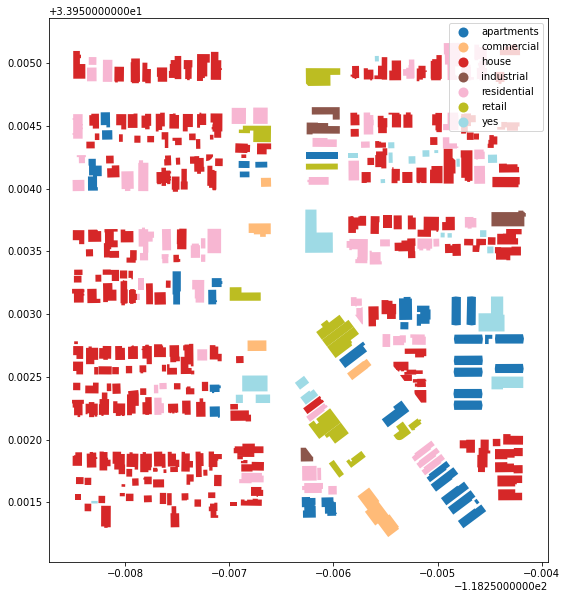

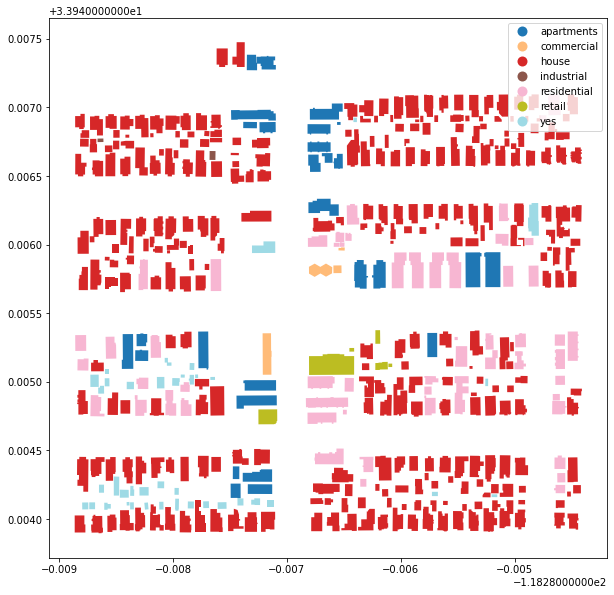

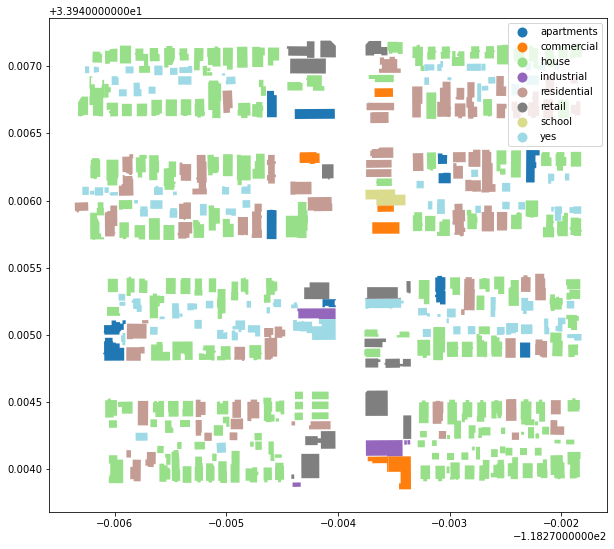

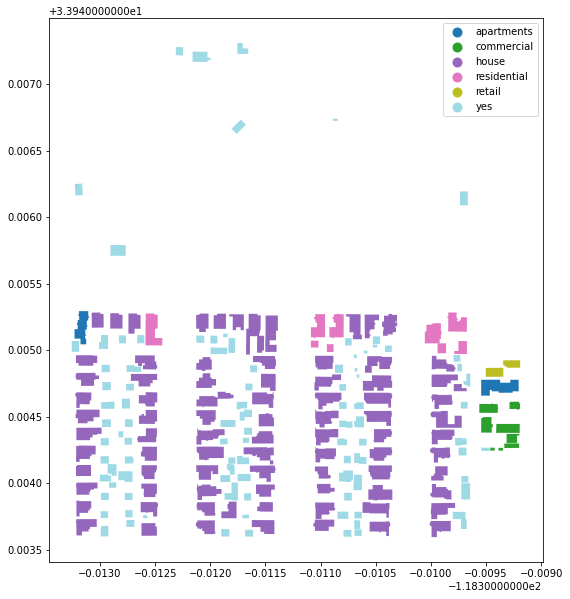

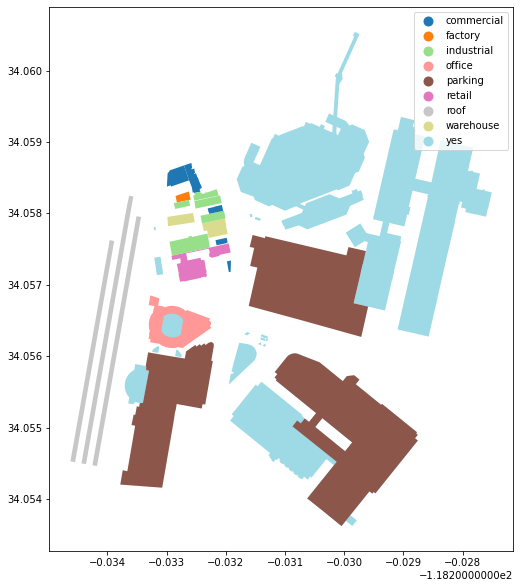

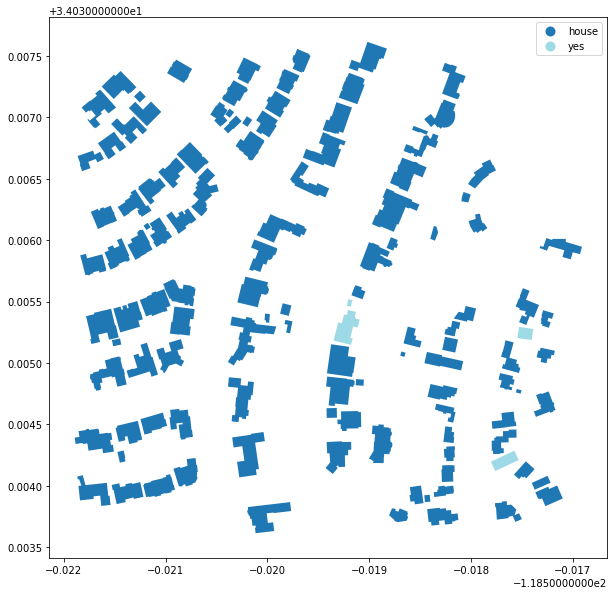

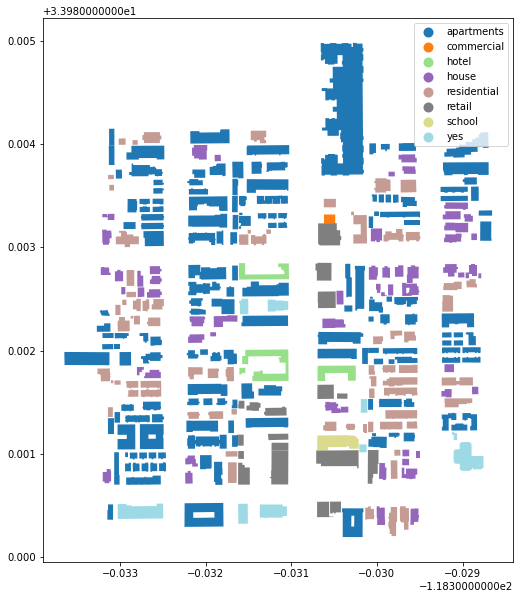

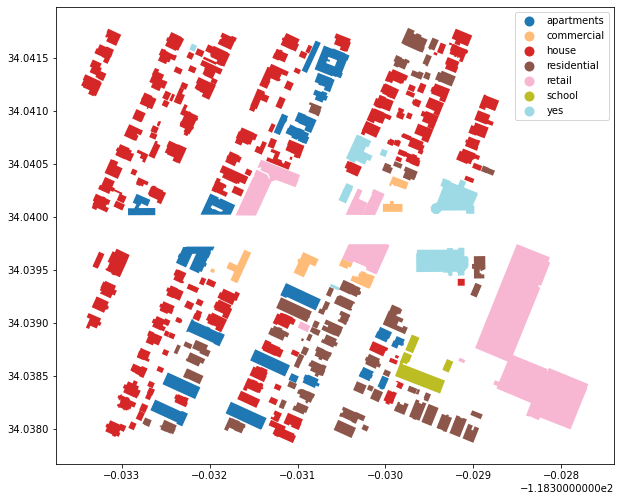

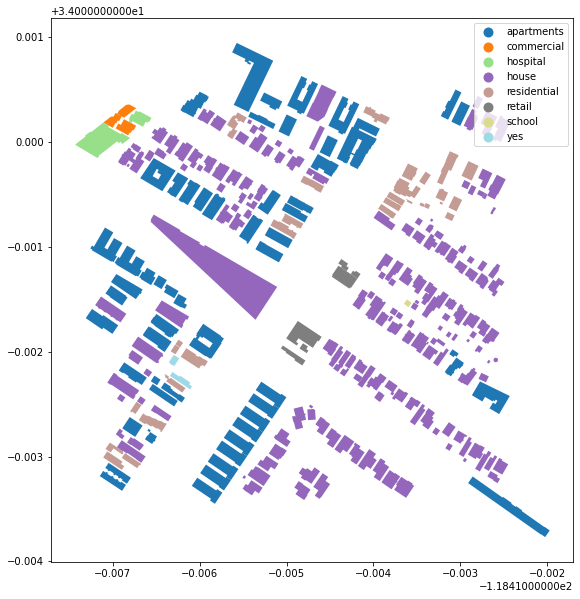

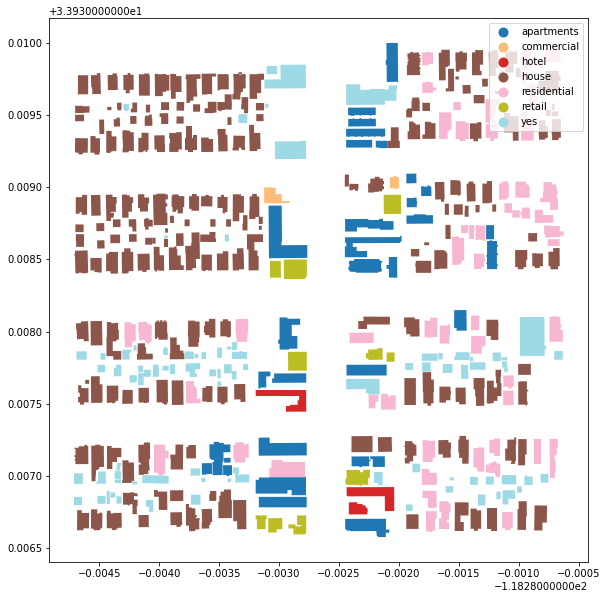

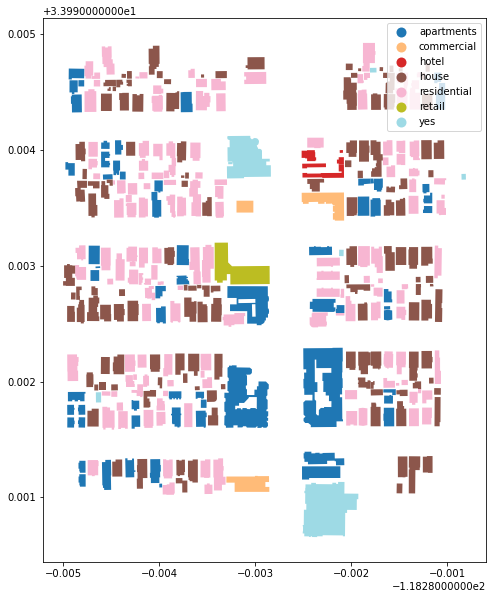

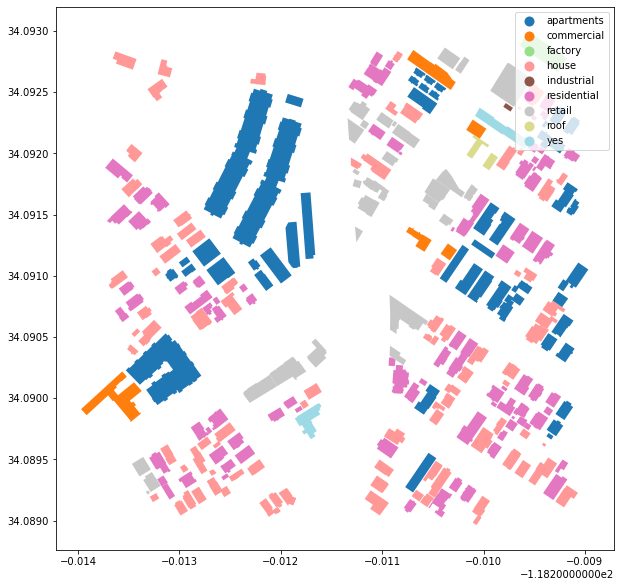

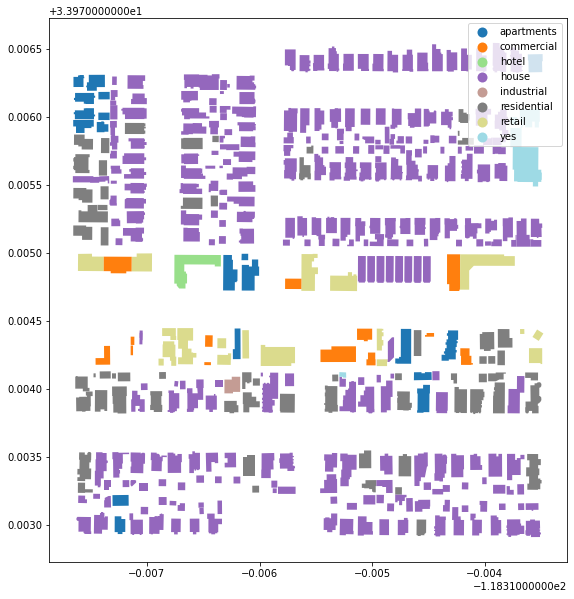

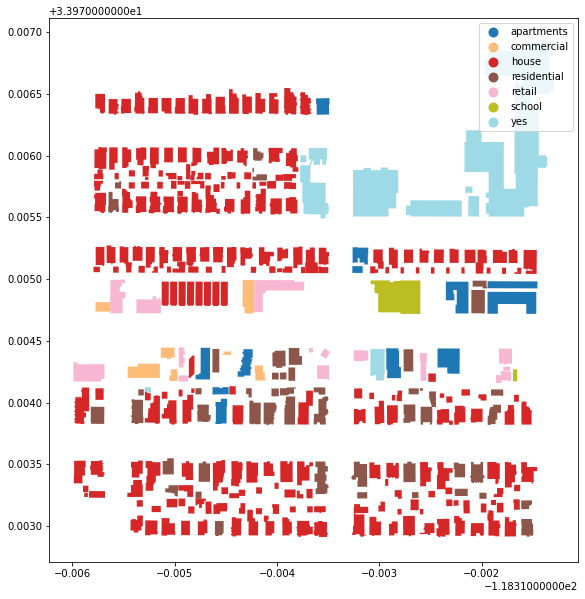

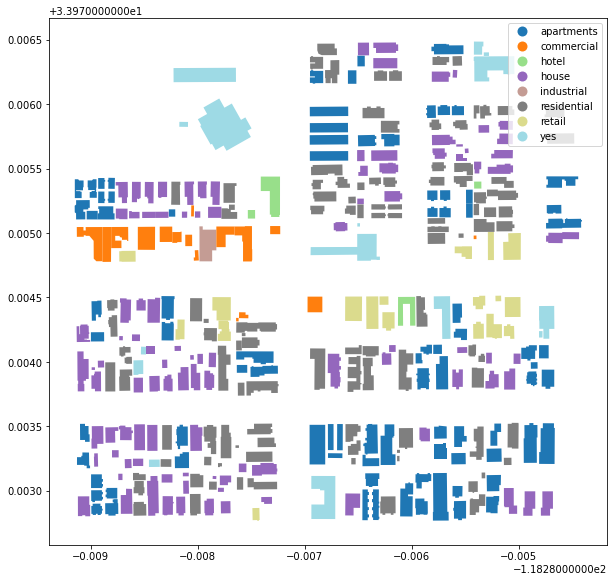

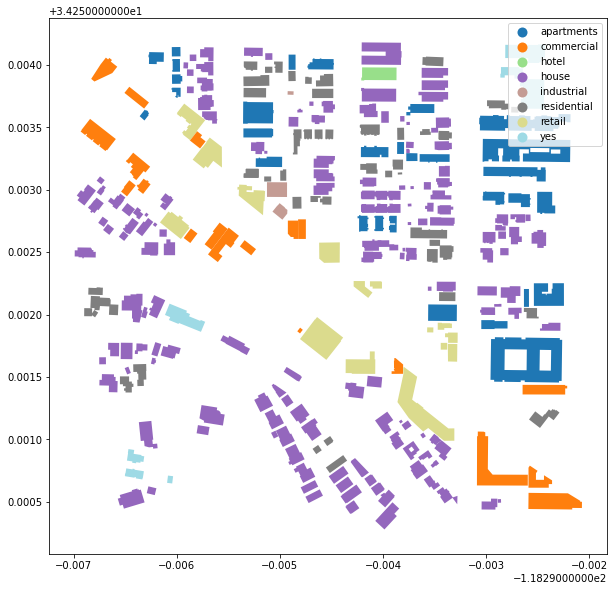

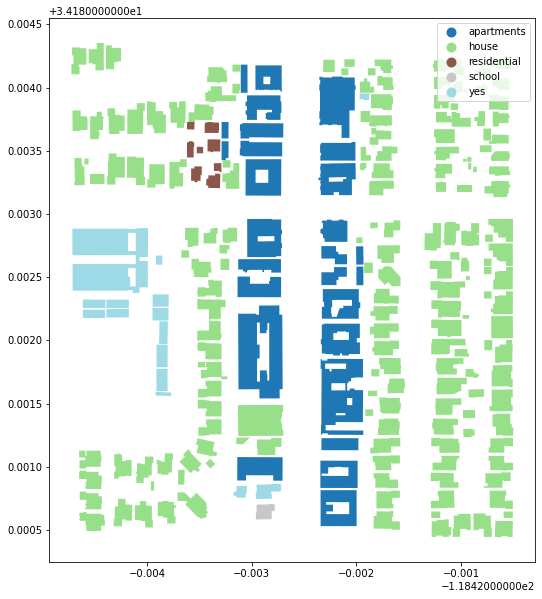

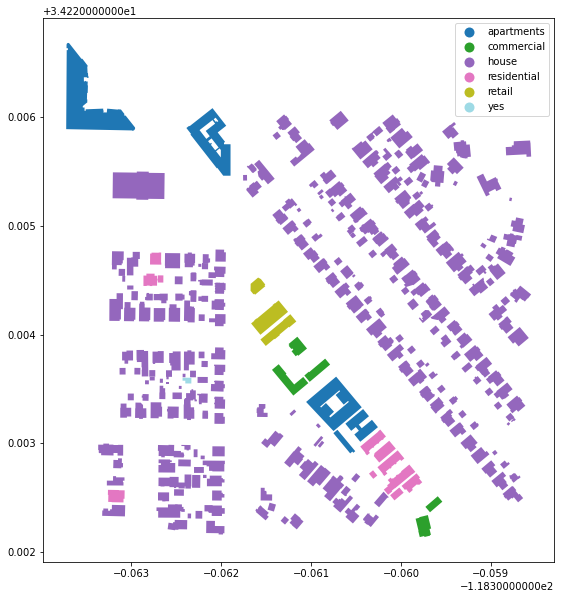

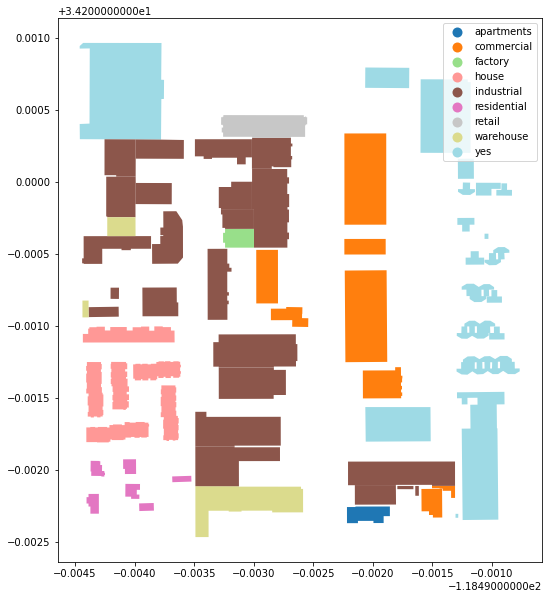

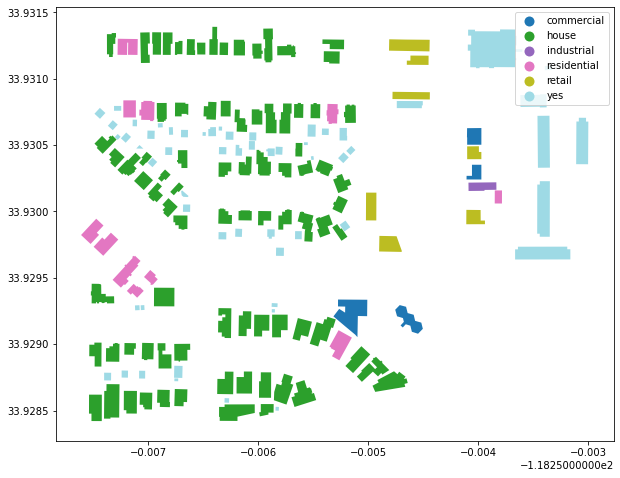

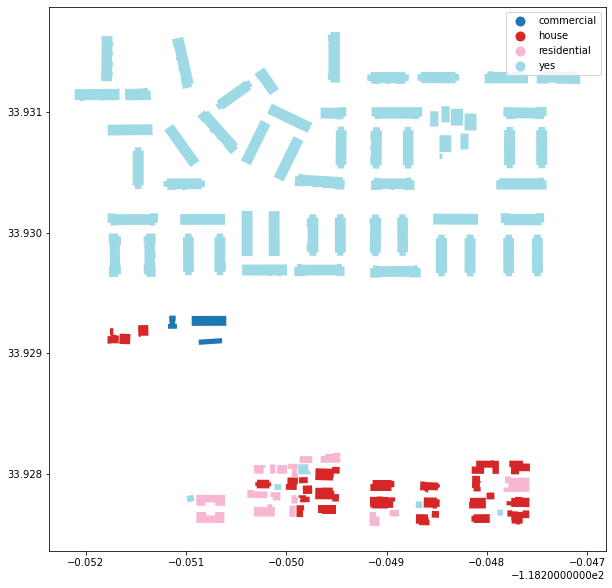

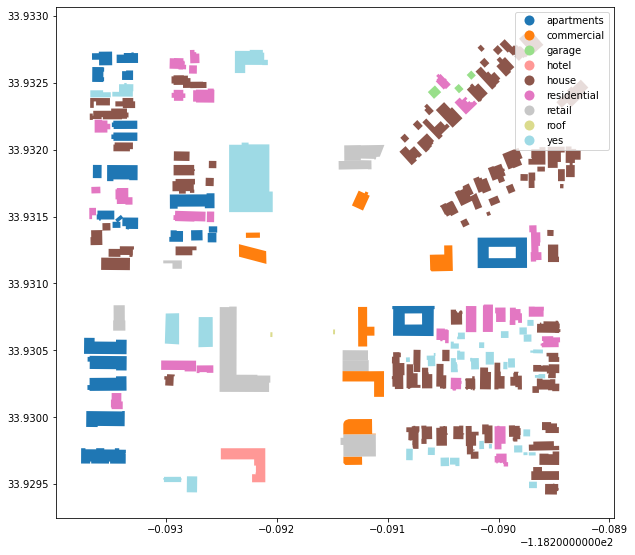

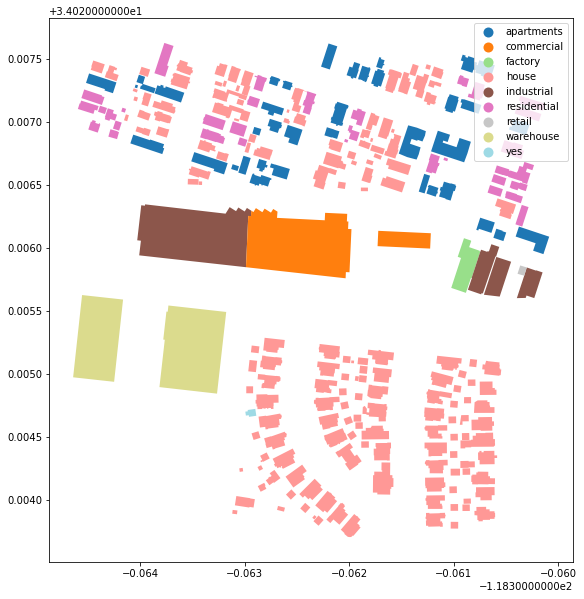

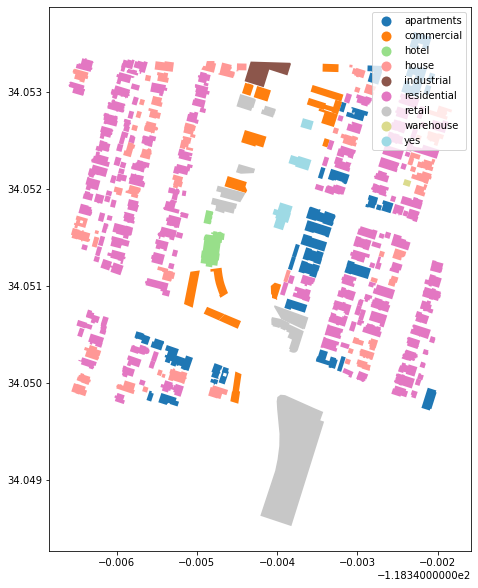

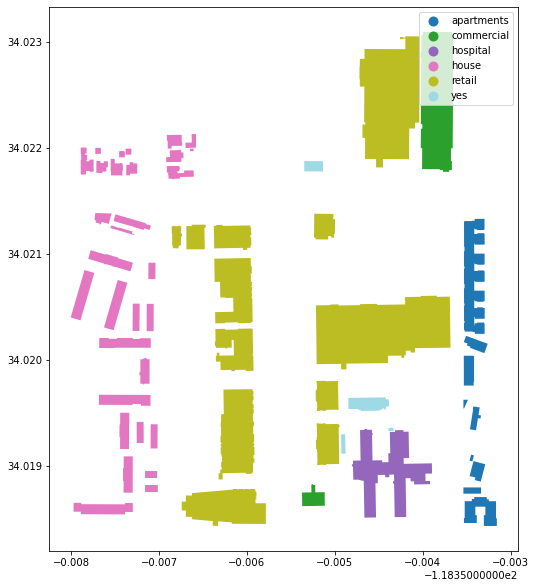

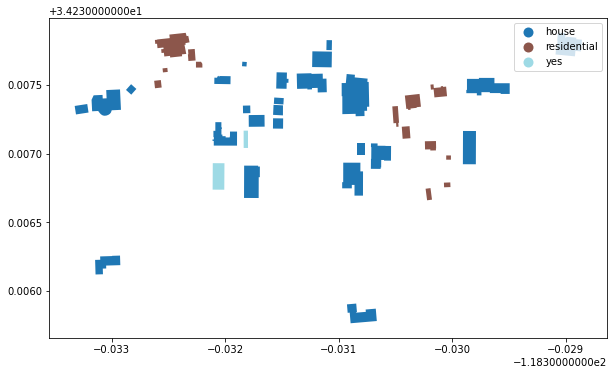

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

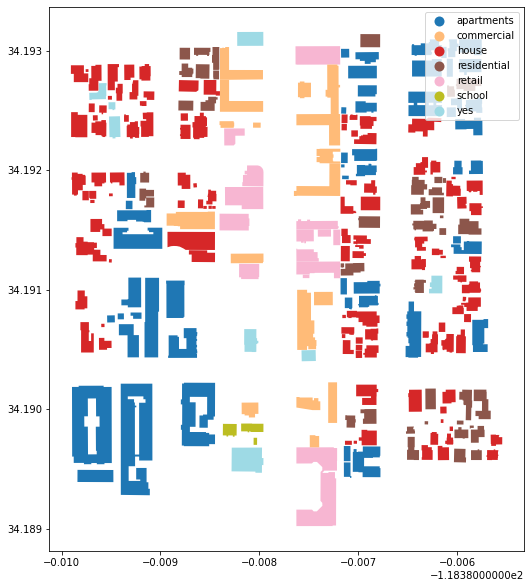

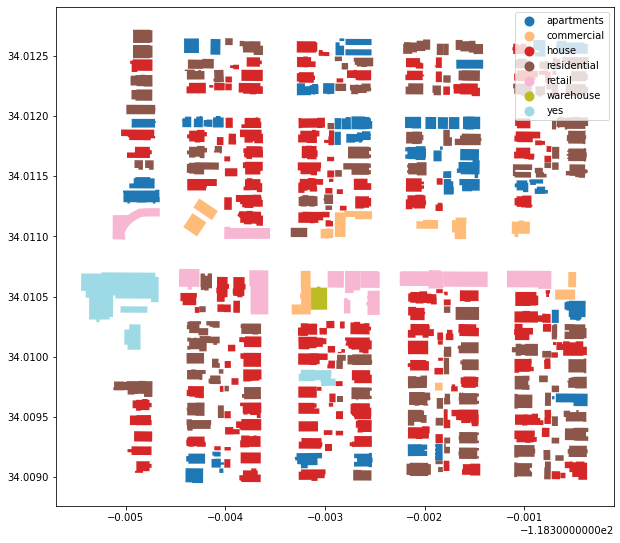

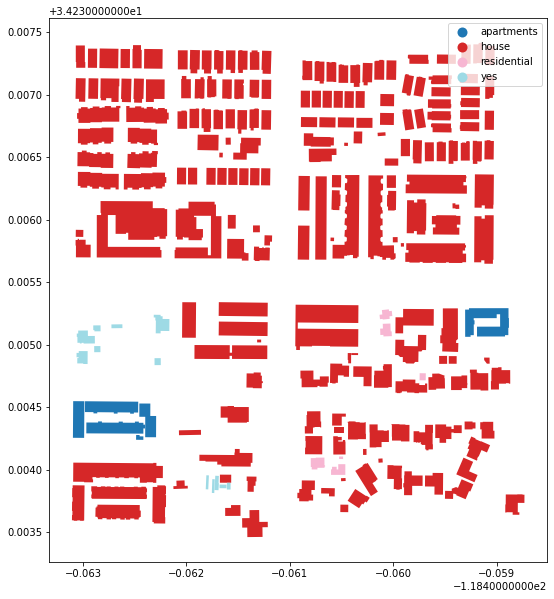

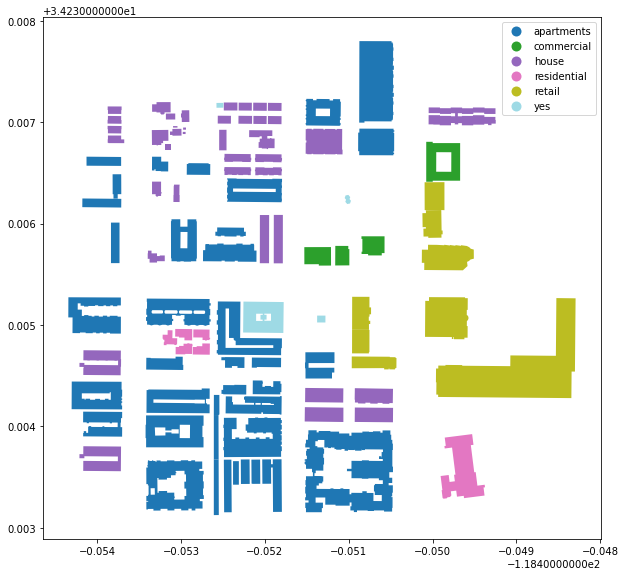

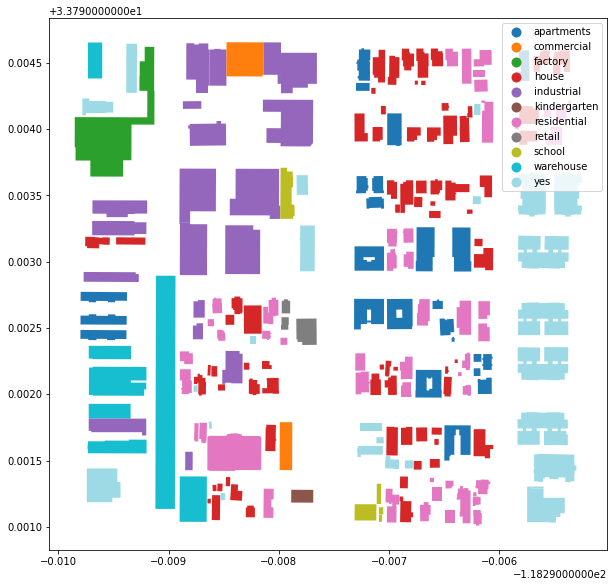

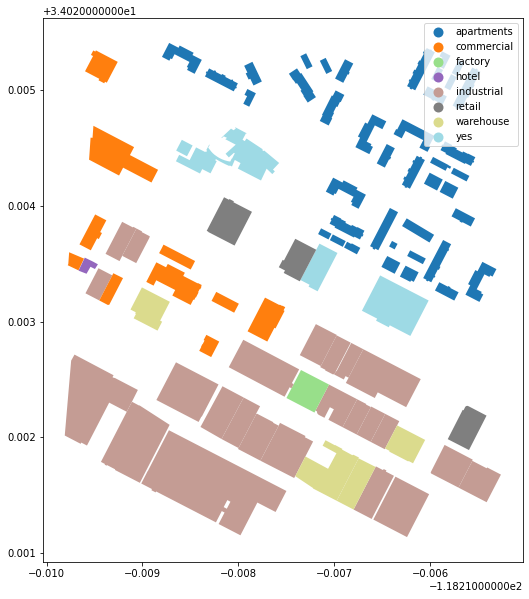

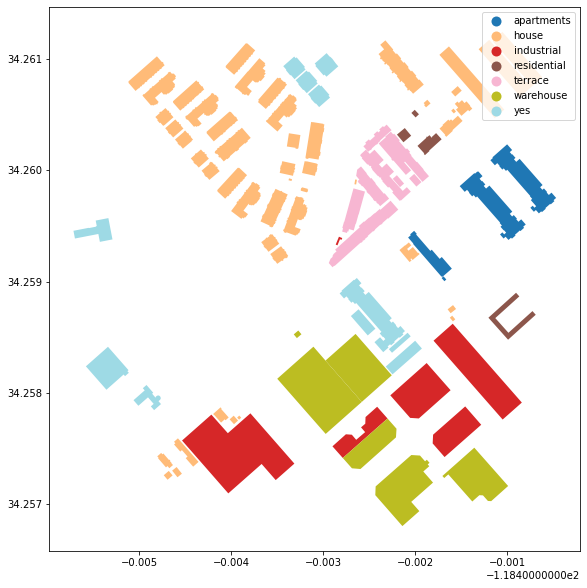

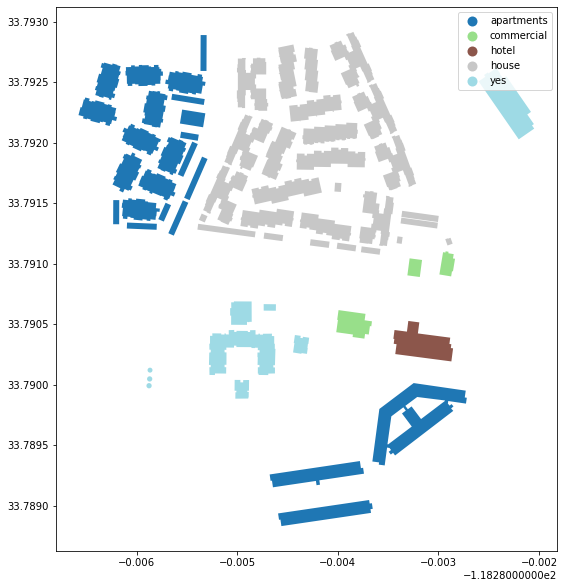

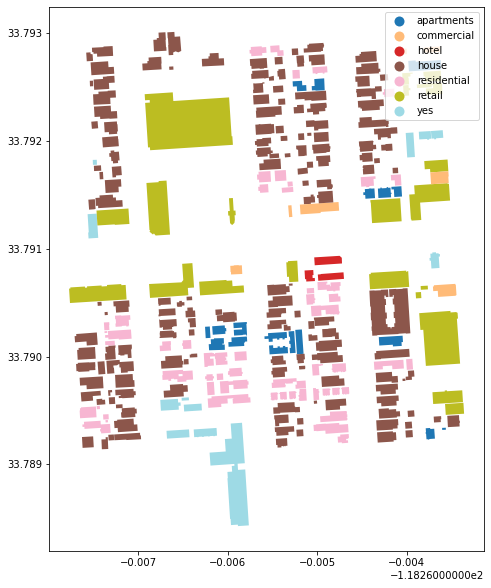

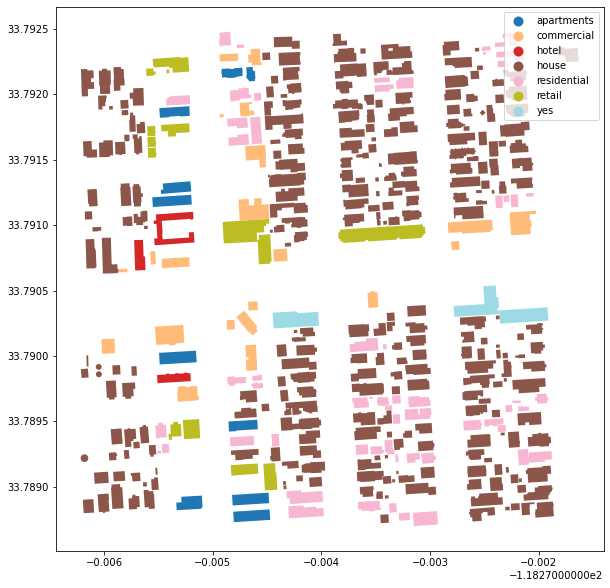

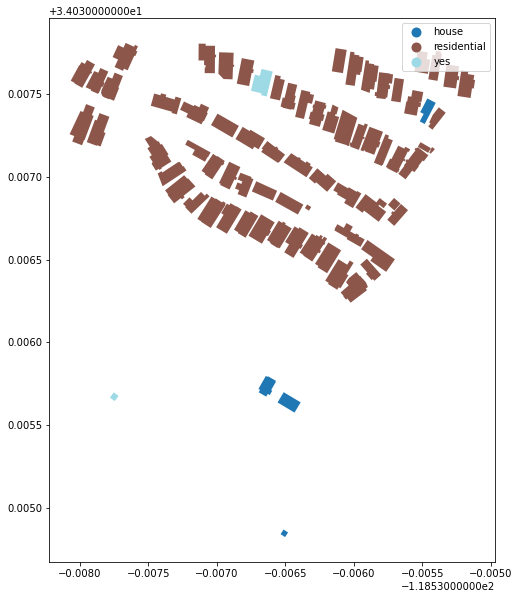

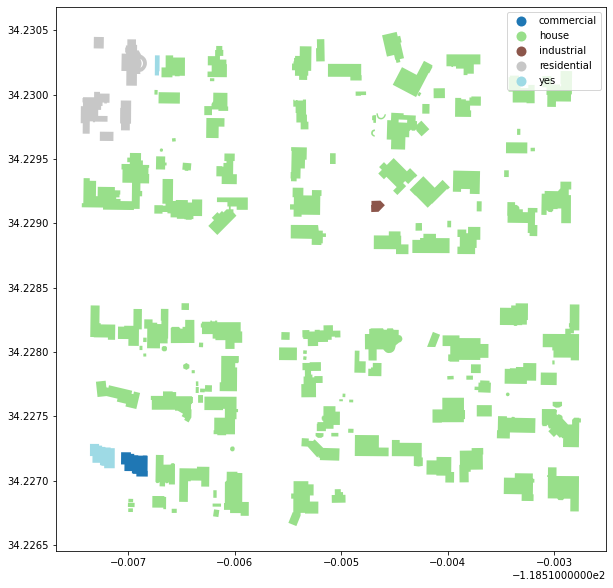

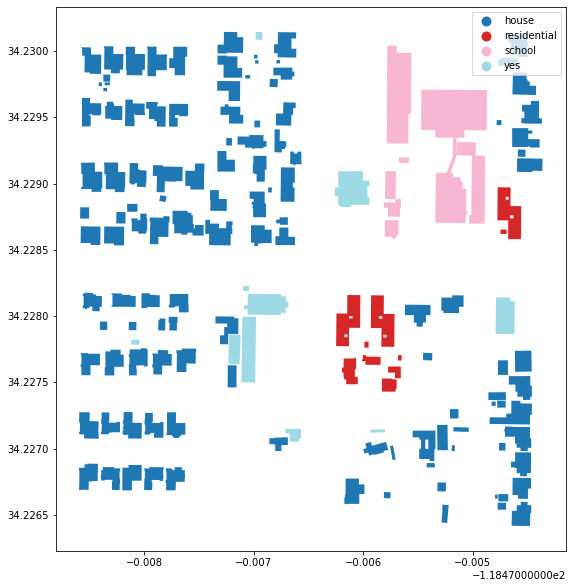

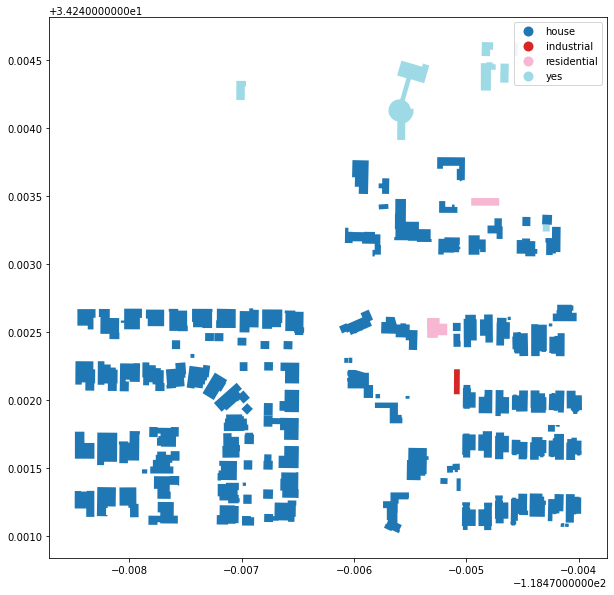

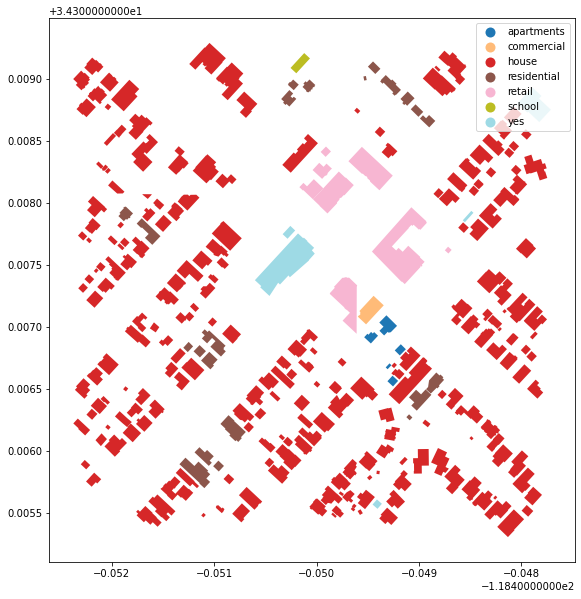

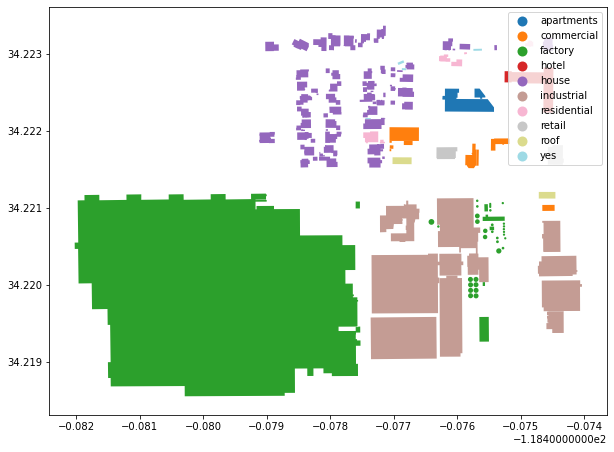

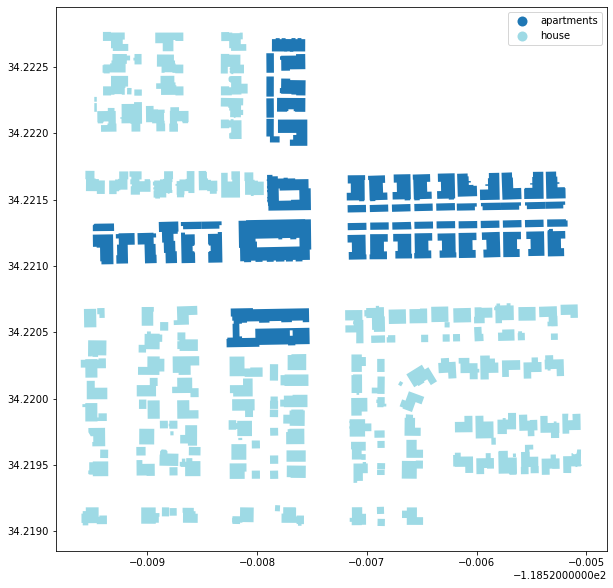

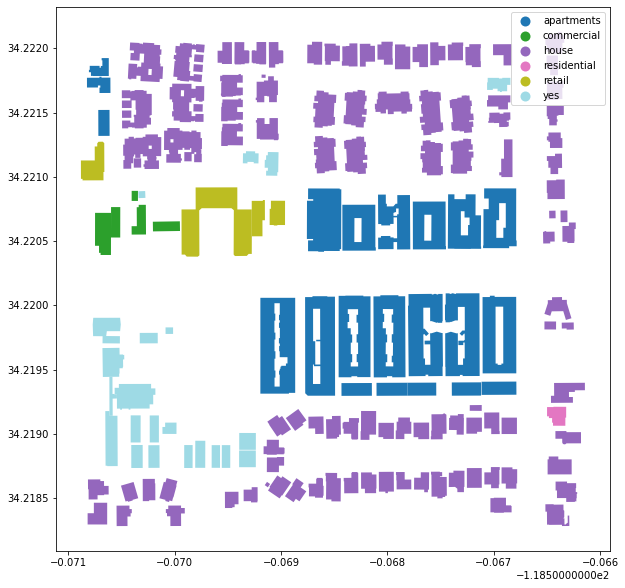

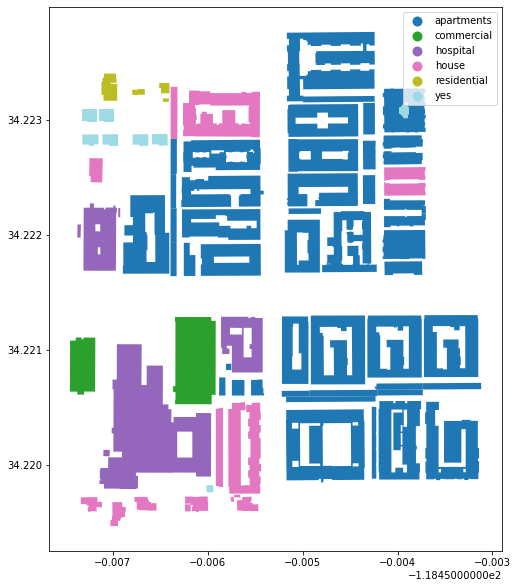

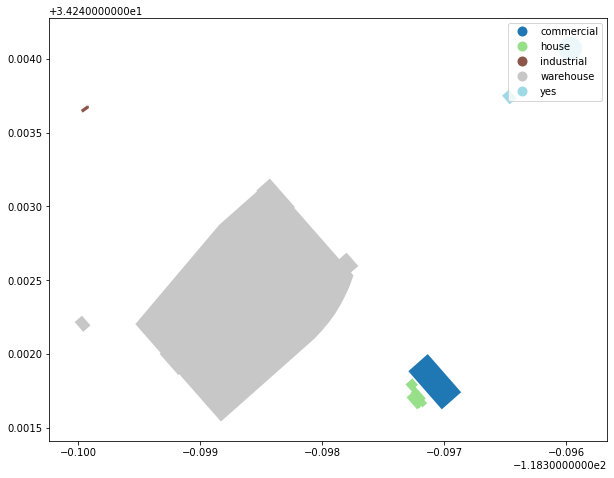

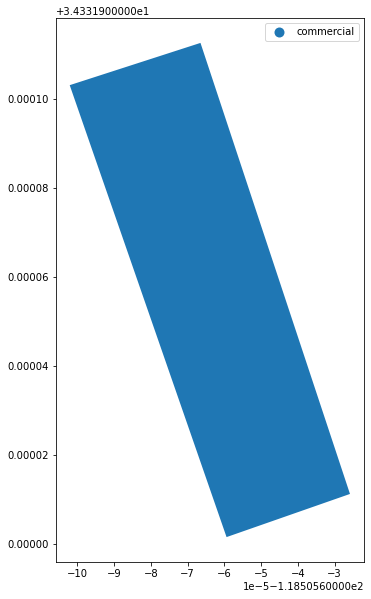

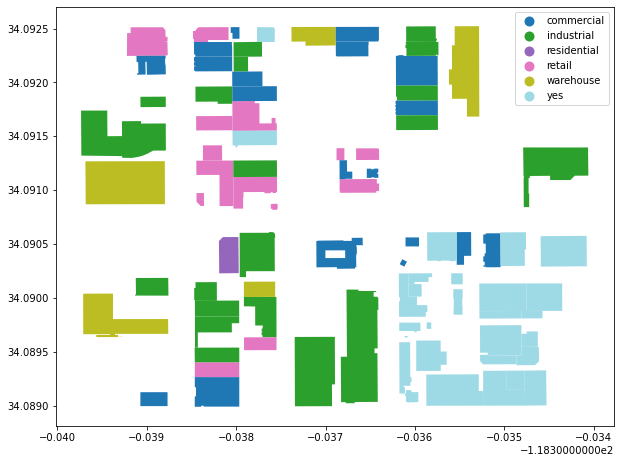

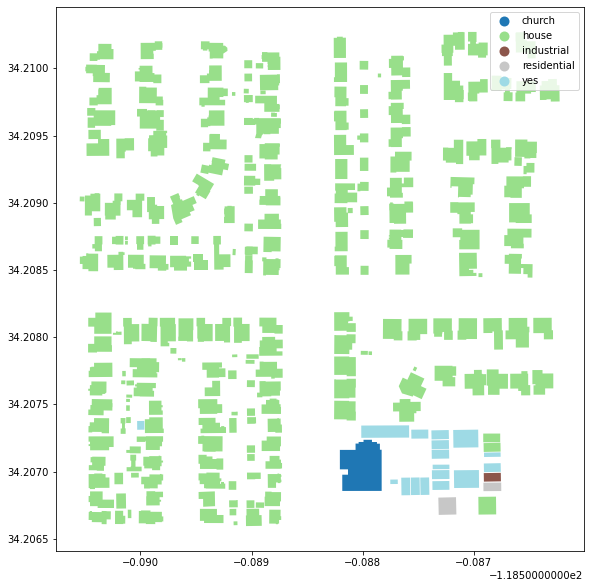

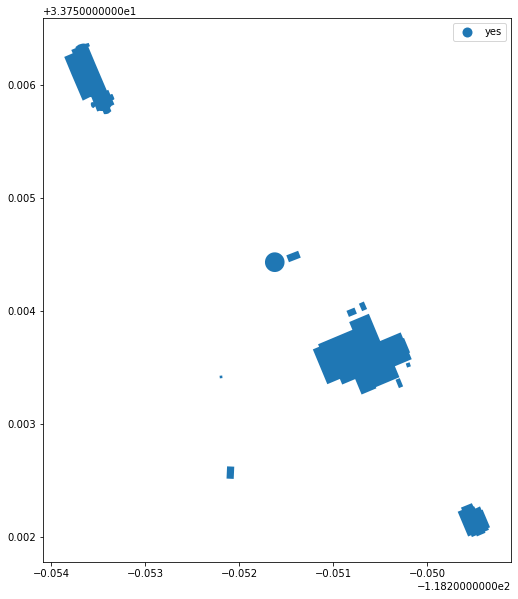

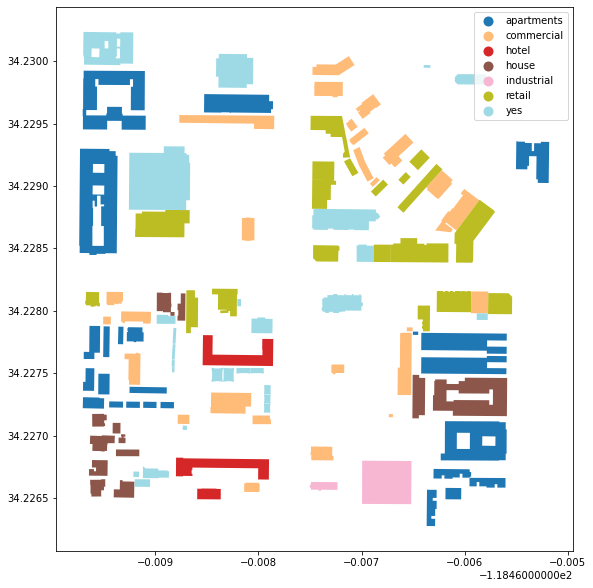

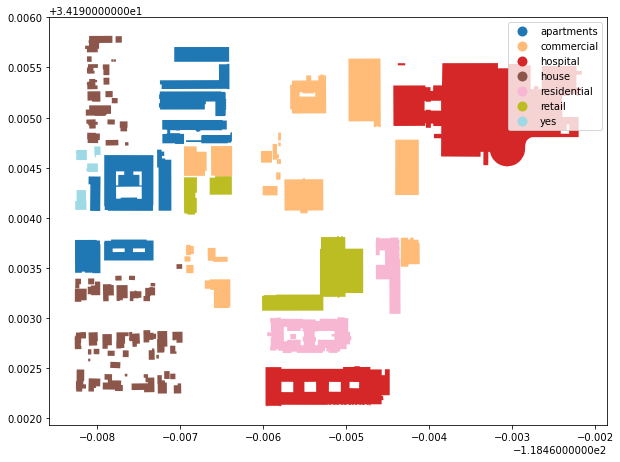

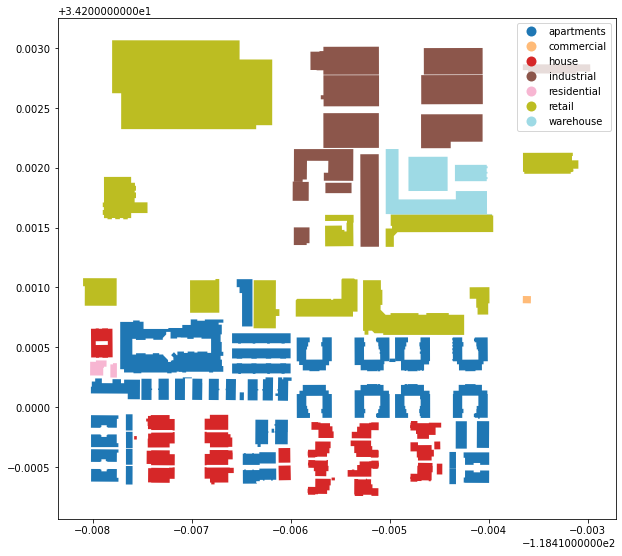

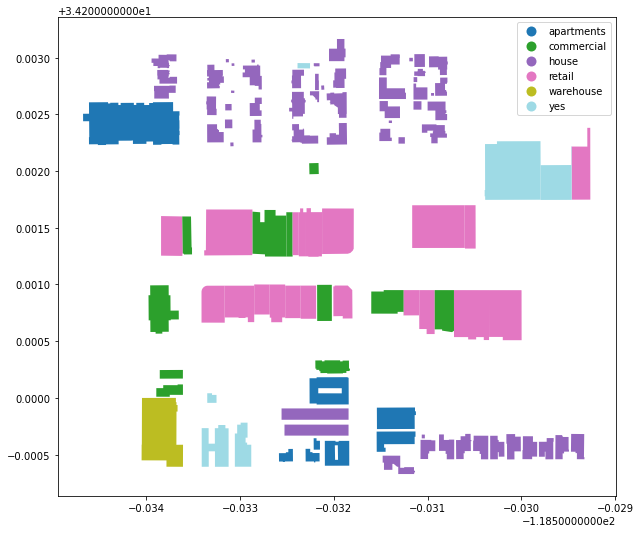

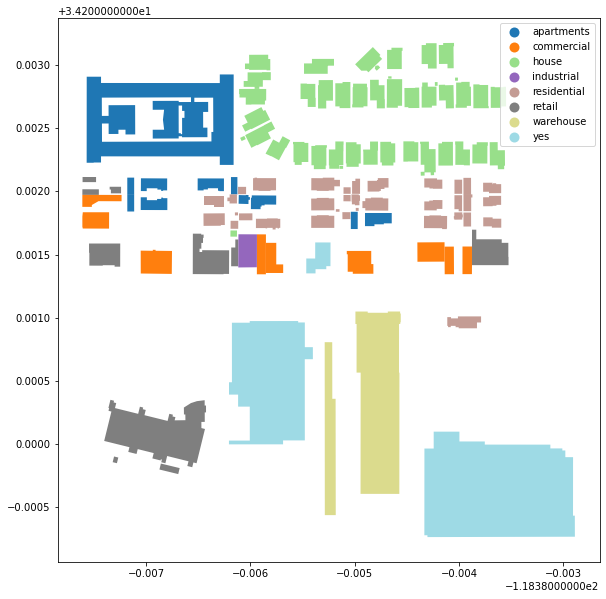

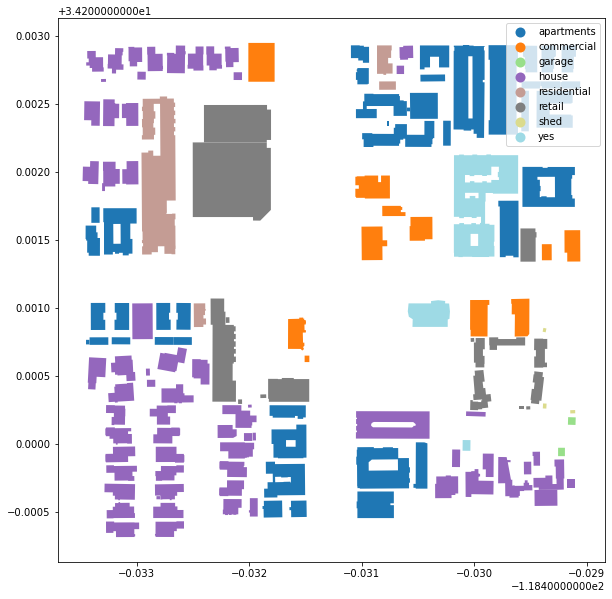

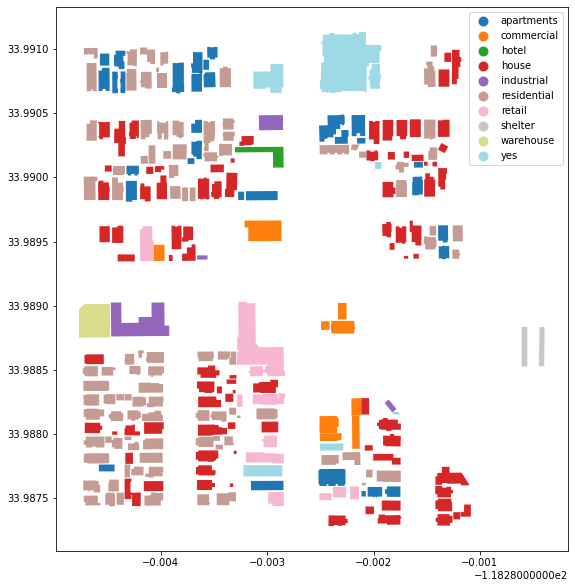

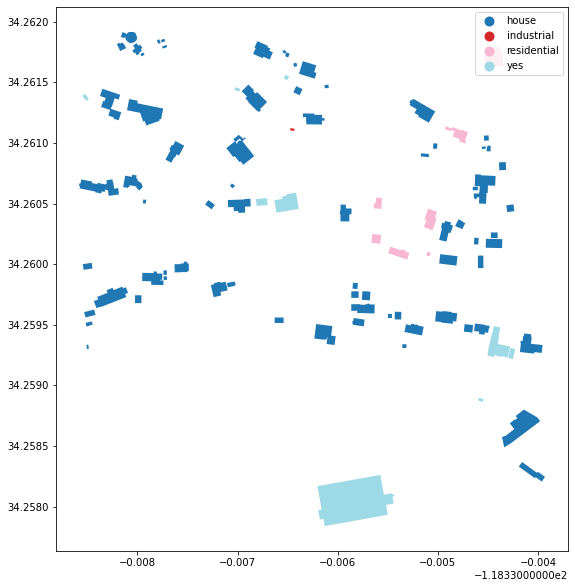

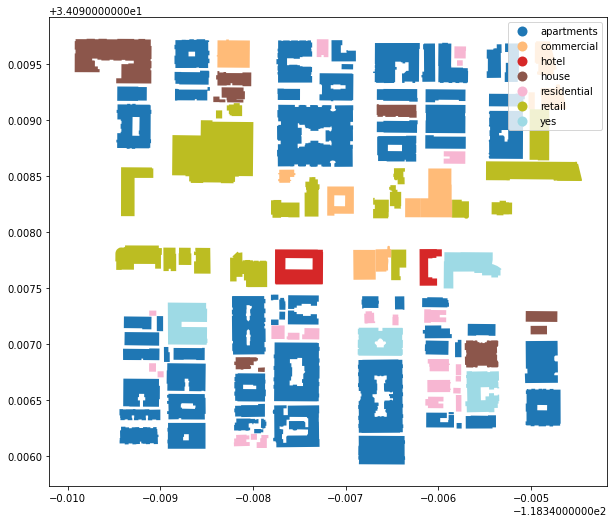

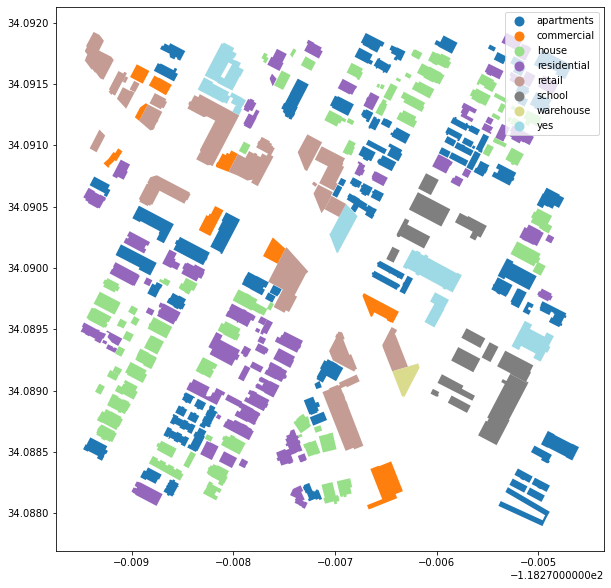

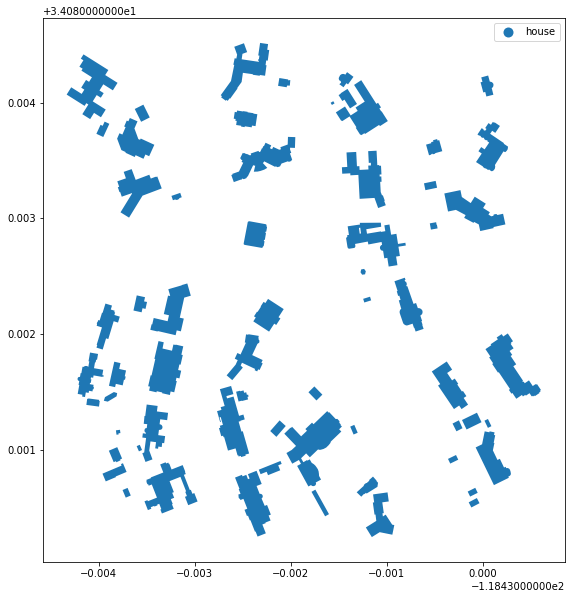

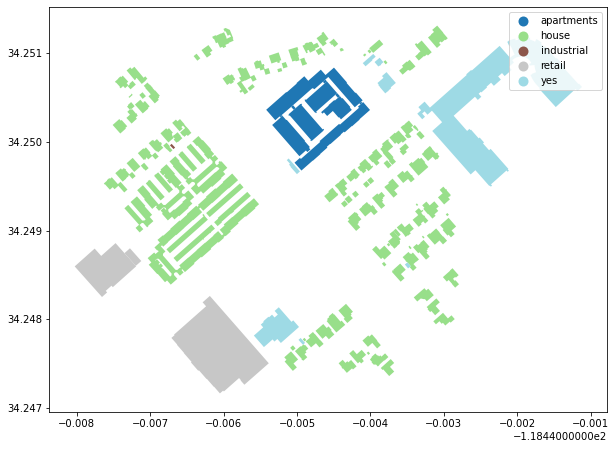

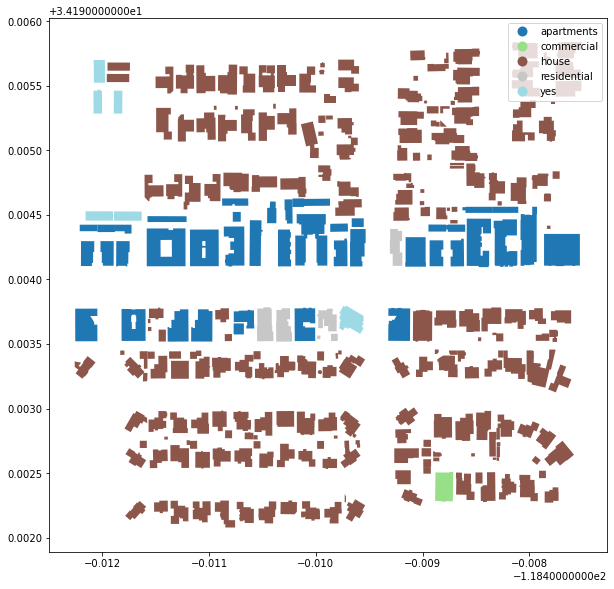

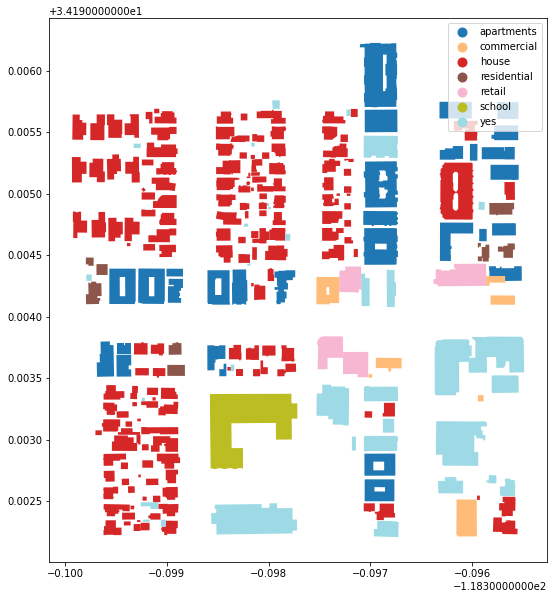

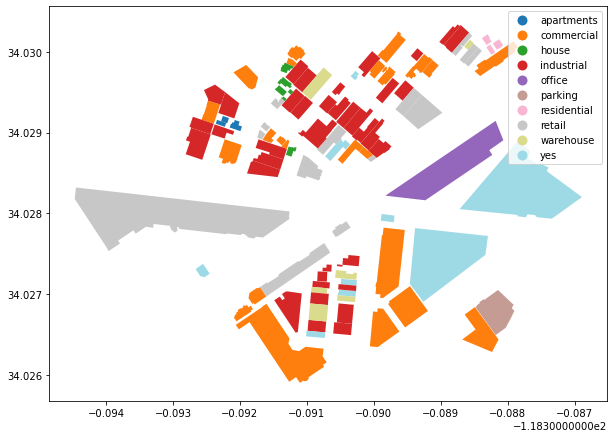

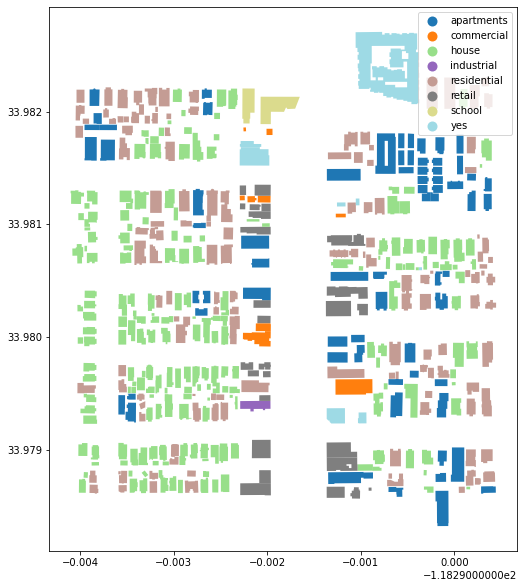

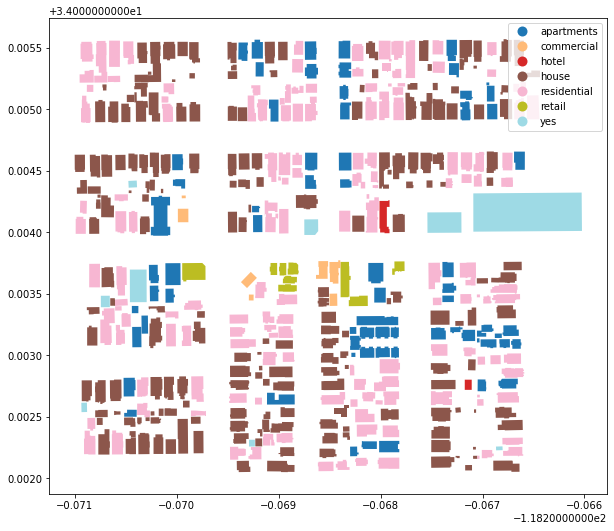

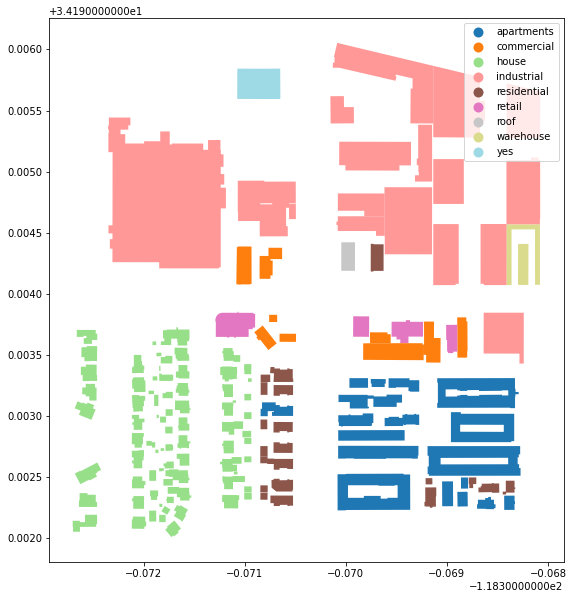

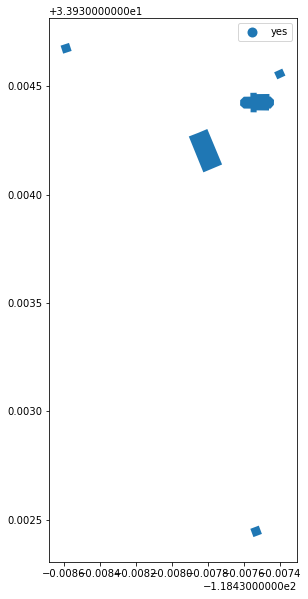

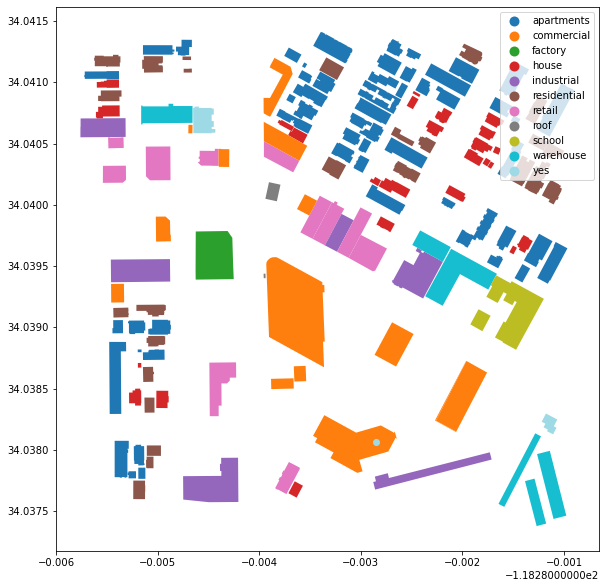

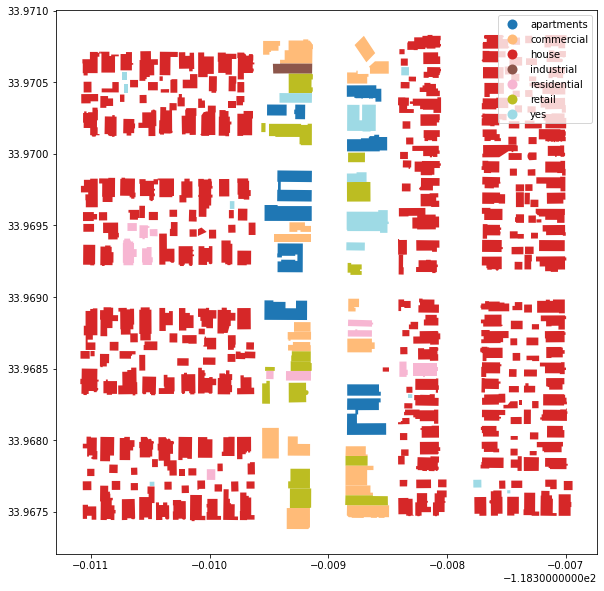

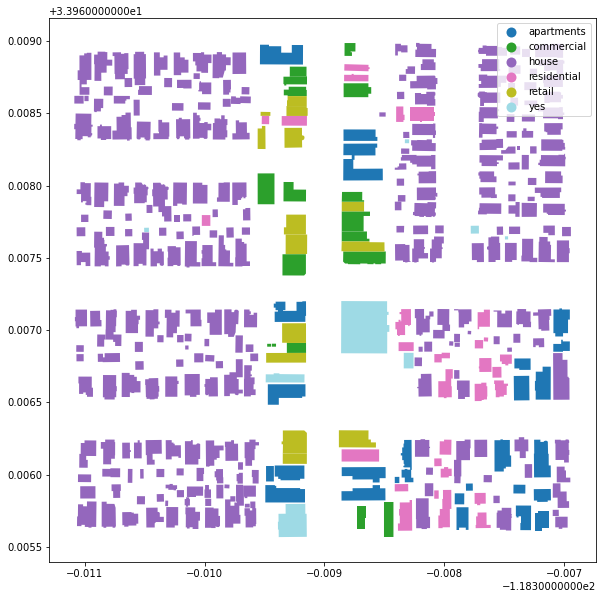

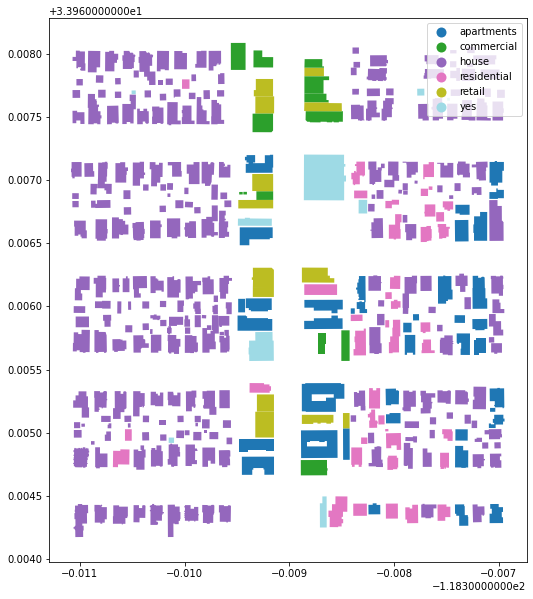

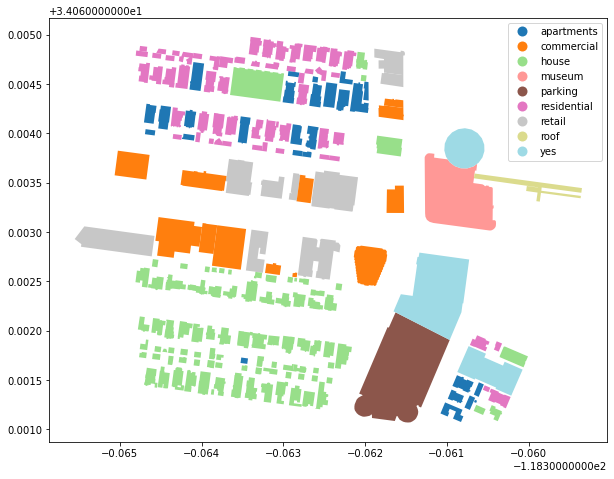

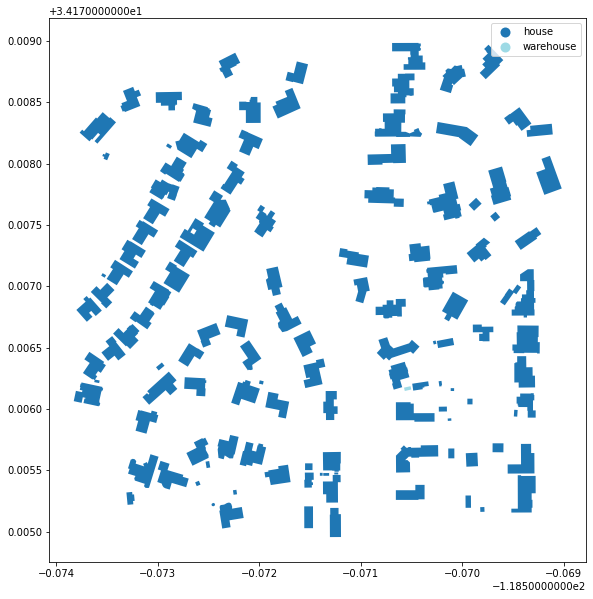

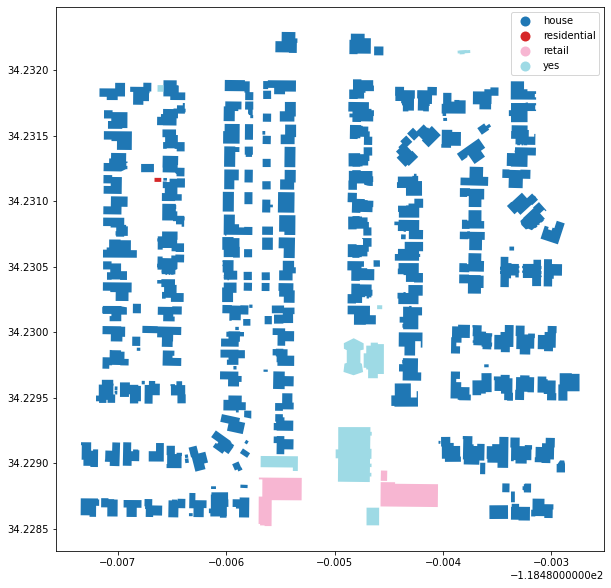

In [23]:

#create loop
for index, row in gdfbuildings.iterrows():
    print(str(index)+'...')
    #call the function
    map_buildinguse(row.lat,row.lon)